# Colour Correction using Splines

### Define constants

In [ ]:
# Enable automatic reloading of modules before executing code to ensure latest changes are used.
%load_ext autoreload
%autoreload 2

# Importing necessary libraries and functions.
# 'colour' is used for color science computations.
# 'data' contains functions to load various datasets and color matching functions.
import colour
from data import (load_dataset_sfu, load_dataset_csv, load_cmfs, 
                  load_camera, load_insitu, msds_to_rgb, msds_to_xyz, load_dataset_skin)
import numpy as np

# Setting a seed for random number generation to ensure reproducibility.
RANDOM_STATE = 0
np.random.seed(RANDOM_STATE)


### Computing Observer Responses
We can easily change the order of test and train sets here

In [ ]:
from plotting import plot_chromaticity_diagram
from colour.characterisation import training_data_sds_to_XYZ

cmfs, illuminant = load_cmfs()

### Computing Camera Responses

In [ ]:
from colour.characterisation import normalise_illuminant, training_data_sds_to_RGB
import numpy as np


### Fit Generalized Additive Model with P-splines

### Nikon

Fitting GAMOptimizer with 5 splines and lambda 1e-09
225


/Users/jonisuominen/miniconda3/envs/color/lib/python3.12/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Fitting GAMOptimizer with 10 splines and lambda 0.0001
900
Fitting GAMOptimizer with 20 splines and lambda 0.01


/Users/jonisuominen/miniconda3/envs/color/lib/python3.12/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


3600


/Users/jonisuominen/miniconda3/envs/color/lib/python3.12/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


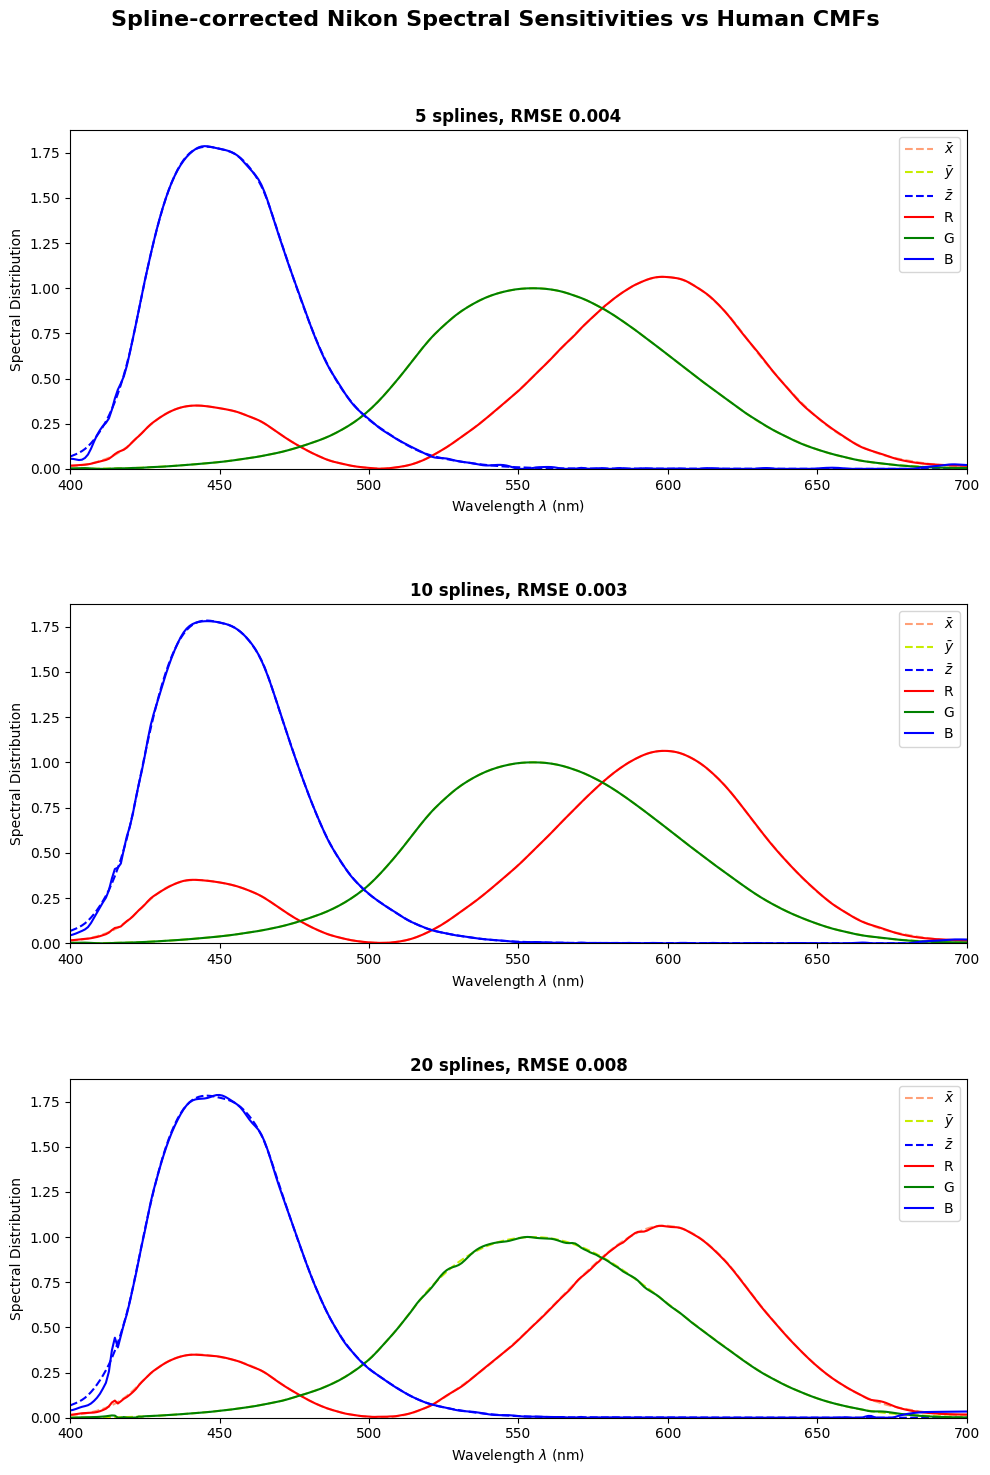

In [39]:
import matplotlib.pyplot as plt
from colour.plotting import plot_multi_sds
from colour import MultiSpectralDistributions, SpectralShape
from models import GAMOptimizer
from sklearn.metrics import mean_squared_error

MSDS_TRAIN = load_camera('nikon')
def plot_gam_fits(splines_lams_dict, order_value=3):
    n_plots = len(splines_lams_dict)
    fig, axes = plt.subplots(n_plots, 1, figsize=(10, n_plots * 5))

    for i, (n_splines, lams_value) in enumerate(splines_lams_dict.items()):
        print(f"Fitting GAMOptimizer with {n_splines} splines and lambda {lams_value}")
        gam = GAMOptimizer(lams=lams_value, order=order_value, n_splines=n_splines)
        gam.fit(MSDS_TRAIN.values, cmfs.values)
        out = gam.predict(MSDS_TRAIN.values)
        out[out < 0] = 0
        out_spectra = MultiSpectralDistributions(out, SpectralShape(400, 700, 1))
        rmse = mean_squared_error(cmfs.values, out, squared=False)
        plot_kwargs = [
            {"use_sd_colours": True, "linestyle": "dashed"},
            {"use_sd_colours": True, "linestyle": "dashed"},
            {"use_sd_colours": True, "linestyle": "dashed"},

            {"use_sd_colours": False, "linestyle": "solid", "color": "red", "label": "R"},
            {"use_sd_colours": False, "linestyle": "solid", "color": "green", "label": "G"},
            {"use_sd_colours": False, "linestyle": "solid", "color": "blue", "label": "B"},
        ]

        plot_multi_sds([cmfs, out_spectra], plot_kwargs=plot_kwargs, transparent_background=False, show=False, figure=fig, axes=axes[i])
        axes[i].set_title(f"{n_splines} splines, RMSE {rmse:.3f}", weight="bold")
    
    fig.suptitle("Spline-corrected Nikon Spectral Sensitivities vs Human CMFs", fontsize=16, weight='bold')
    plt.subplots_adjust(hspace=0.4, top=0.9)
    plt.savefig("gam_optimizer_fits.png", transparent=False)
    plt.show()

# Define your spline-lambda mapping
splines_lams_dict = {
    5: 1e-9,
    10: 0.0001,
    20: 0.01
}

# Call the function with your dictionary
plot_gam_fits(splines_lams_dict)


### Sigma

Fitting GAMOptimizer with 5 splines and lambda 1e-09
225


/Users/jonisuominen/miniconda3/envs/color/lib/python3.12/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Fitting GAMOptimizer with 10 splines and lambda 0.0001
900
Fitting GAMOptimizer with 20 splines and lambda 0.0001


/Users/jonisuominen/miniconda3/envs/color/lib/python3.12/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


3600


/Users/jonisuominen/miniconda3/envs/color/lib/python3.12/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


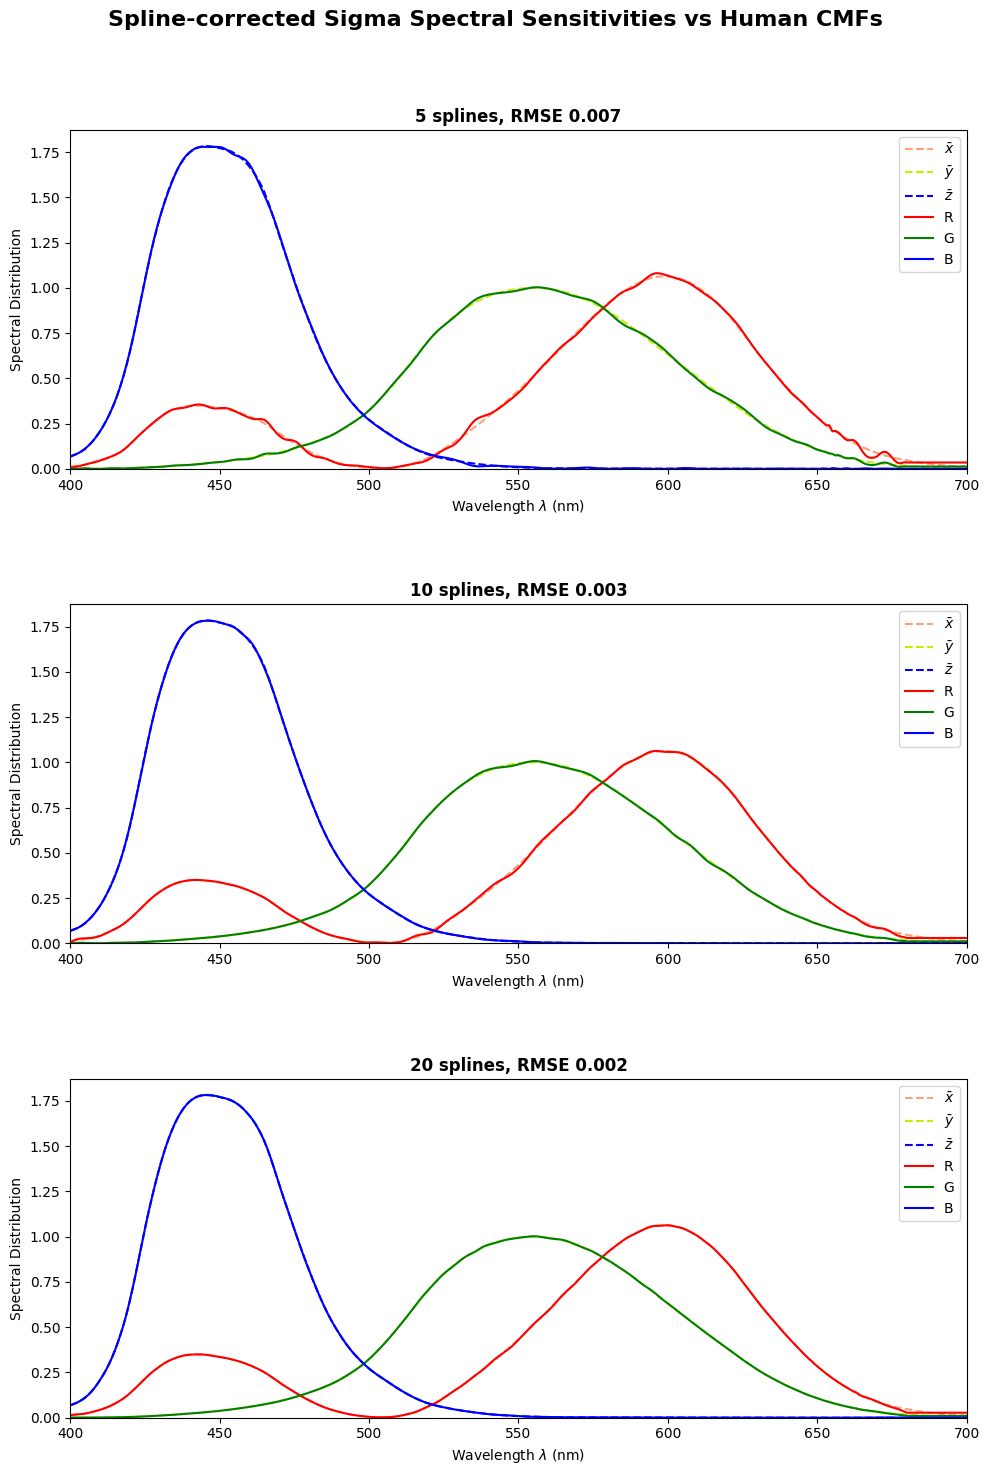

In [40]:
import matplotlib.pyplot as plt
from colour.plotting import plot_multi_sds
from colour import MultiSpectralDistributions, SpectralShape
from models import GAMOptimizer

MSDS_TRAIN = load_camera('sigma')
def plot_gam_fits(splines_lams_dict, order_value=3):
    n_plots = len(splines_lams_dict)
    fig, axes = plt.subplots(n_plots, 1, figsize=(10, n_plots * 5))

    for i, (n_splines, lams_value) in enumerate(splines_lams_dict.items()):
        print(f"Fitting GAMOptimizer with {n_splines} splines and lambda {lams_value}")
        gam = GAMOptimizer(lams=lams_value, order=order_value, n_splines=n_splines)
        gam.fit(MSDS_TRAIN.values, cmfs.values)
        out = gam.predict(MSDS_TRAIN.values)
        out[out < 0] = 0
        rmse = mean_squared_error(cmfs.values, out, squared=False)
        out_spectra = MultiSpectralDistributions(out, SpectralShape(400, 700, 1))

        plot_kwargs = [
            {"use_sd_colours": True, "linestyle": "dashed"},
            {"use_sd_colours": True, "linestyle": "dashed"},
            {"use_sd_colours": True, "linestyle": "dashed"},

            {"use_sd_colours": False, "linestyle": "solid", "color": "red", "label": "R"},
            {"use_sd_colours": False, "linestyle": "solid", "color": "green", "label": "G"},
            {"use_sd_colours": False, "linestyle": "solid", "color": "blue", "label": "B"},
        ]

        plot_multi_sds([cmfs, out_spectra], plot_kwargs=plot_kwargs, transparent_background=False, show=False, figure=fig, axes=axes[i])
        axes[i].set_title(f"{n_splines} splines, RMSE {rmse:.3f}", weight="bold")
    
    fig.suptitle("Spline-corrected Sigma Spectral Sensitivities vs Human CMFs", fontsize=16, weight='bold')
    plt.subplots_adjust(hspace=0.4, top=0.9)
    plt.savefig("gam_optimizer_fits.png", transparent=False)
    plt.show()

# Define your spline-lambda mapping
splines_lams_dict = {
    5: 1e-9,
    10: 0.0001,
    20: 0.0001
}

# Call the function with your dictionary
plot_gam_fits(splines_lams_dict)


In [ ]:
from models import RGBtoXYZNetwork

mcdonalds_nn = RGBtoXYZNetwork()
mcdonalds_nn.fit(response_trainset_camera, response_trainset_xyz)
pred(mcdonalds_nn, response_testset_camera, response_testset_xyz, "Foster 50")

### Fit Linear Model

In [ ]:
from sklearn.linear_model import LinearRegression

linear = LinearRegression(fit_intercept=False)


linear.fit(response_trainset_camera, response_trainset_xyz)
pred(linear, response_testset_camera, response_testset_xyz, "Foster 50")


In [ ]:
from sklearn.pipeline import Pipeline
from models import DeltaEOptimizer

DE2000RP = Pipeline([
    ('regressor', DeltaEOptimizer(root_polynomial=False, degree=1))
])


DE2000RP.fit(response_trainset_camera, response_trainset_xyz)
pred(DE2000RP, response_testset_camera, response_testset_xyz, "DeltaE Foster+CAVE")

### Fit 3rd order Root-Polynomial Model

In [ ]:
from models import PolynomialTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression

RP_linear_3 = Pipeline([
    ('transformer', PolynomialTransformer(degree=3, rp=True)),
    ('regressor', LinearRegression(fit_intercept=False))
])

RP_linear_3.fit(response_trainset_camera, response_trainset_xyz)

pred(RP_linear_3, response_testset_camera, response_testset_xyz, "DeltaE Foster+CAVE")


### Fit a 2nd order Root-Polynomial Model

In [ ]:
from models import GAMOptimizer, PolynomialTransformer, DeltaEOptimizer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression

RP_linear_2 = Pipeline([
    ('transformer', PolynomialTransformer(degree=2, rp=True)),
    ('regressor', LinearRegression(fit_intercept=False))
])


RP_linear_2.fit(response_trainset_camera, response_trainset_xyz)
pred(RP_linear_2, response_testset_camera, response_testset_xyz, "DeltaE Foster+CAVE")


In [ ]:
P_Linear_3 = Pipeline([
    ('transformer', PolynomialTransformer(degree=3, rp=False)),
    ('regressor', LinearRegression(fit_intercept=False))
])


P_Linear_3.fit(response_trainset_camera, response_trainset_xyz)
pred(P_Linear_3, response_testset_camera, response_testset_xyz, "DeltaE Foster+CAVE")

In [ ]:
P_linear = Pipeline([
    ('transformer', PolynomialTransformer(degree=2, rp=False)),
    ('regressor', LinearRegression(fit_intercept=False))
])


P_linear.fit(response_trainset_camera, response_trainset_xyz)
pred(P_linear, response_testset_camera, response_testset_xyz, "DeltaE Foster+CAVE")


In [ ]:
from sklearn.pipeline import Pipeline
from models import DeltaEOptimizer

DE2000P = Pipeline([
    ('regressor', DeltaEOptimizer(root_polynomial=False, degree=3))
])


DE2000P.fit(response_trainset_camera, response_trainset_xyz)
pred(DE2000P, response_testset_camera, response_testset_xyz, "DeltaE Foster+CAVE")

In [ ]:
from sklearn.pipeline import Pipeline
from models import DeltaEOptimizer

DE2000RP = Pipeline([
    ('regressor', DeltaEOptimizer(root_polynomial=True, degree=3))
])


DE2000RP.fit(response_trainset_camera, response_trainset_xyz)
pred(DE2000RP, response_testset_camera, response_testset_xyz, "DeltaE Foster+CAVE")